### For each village, find the nearest city

In [1]:
import pandas as pd
import numpy as np

from utils import *

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

(a) village_coords_414 (keep villageid in output file) AND mc_coords_v2_june2017 

In [2]:
a = find_closest("village_coords_414.csv", "mc_coords_v2_june2017.csv")
a.to_csv("output/village_coords_414_mc_coords_tn_june2017.csv", index=False)
a.sample(n=5)

,villageid,latitude,longitude,city,state,distance
40,41,19.04735,73.95509,Pimpri-Chinchwad,MAHARASHTRA,49.036032
90,91,27.02380,74.21793,AJMER,RAJASTHAN,30.915582
238,240,10.08828,77.95673,MADURAI,TAMIL NADU,26.085259
79,80,21.51092,80.54940,Rajnandgaon,CHHATTISGARH,67.736519
78,79,21.51092,80.54940,Rajnandgaon,CHHATTISGARH,67.736519


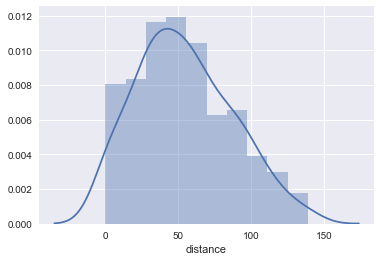

In [3]:
sns.distplot(a.distance)

Repeat this for (b) village_list_tndata_coords_small AND mc_coords_tn_june2017 

In [4]:
b = find_closest("village_list_tndata_coords_small.csv", "mc_coords_tn_june2017.csv")
b.to_csv("output/village_list_tndata_coords_small_mc_coords_tn_june2017.csv", index=False)
b.sample(n=5)

,district,tehsil,psu,SUB_DISTRI,longitude,latitude,city,state,distance
143,Thanjavur,Pattukkottai,149,Pattukkottai,79.345664,10.406026,THANJAVUR,TAMIL NADU,15.549291
101,Coimbatore,Udumalaipettai,107,Udumalaipettai,77.232331,10.523249,COIMBATORE,TAMIL NADU,55.573805
24,Vellore,Vaniyambadi,27,Vaniyambadi,78.694728,12.684822,Vellore,TAMIL NADU,41.014472
156,Pudukkottai,Pudukkottai,163,Pudukkottai,78.904825,10.452664,THANJAVUR,TAMIL NADU,12.194226
109,Tiruchirappalli,Musiri,115,Musiri,78.513044,11.041505,TRICHY,TAMIL NADU,55.573805


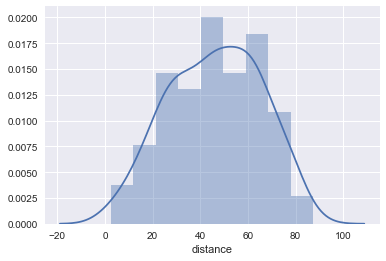

In [5]:
sns.distplot(b.distance)

In [6]:
c = find_closest("village_list_tndata_coords_small.csv", "pop100plus_coords_tn_june2017.csv")
c.to_csv("output/village_list_tndata_coords_small_pop100plus_coords_tn_june2017.csv", index=False)
c.head()

,district,tehsil,psu,SUB_DISTRI,longitude,latitude,city,state,distance
0,Thiruvallur,Thiruvallur,1,Thiruvallur,79.897859,13.122751,KANCHIPURAM,TAMIL NADU,38.252366
2,Thiruvallur,Thiruvallur,4,Thiruvallur,79.897859,13.122751,KANCHIPURAM,TAMIL NADU,42.748190
3,Thiruvallur,Thiruvallur,5,Thiruvallur,79.897859,13.122751,KANCHIPURAM,TAMIL NADU,38.252366
4,Kancheepuram,Maduranthakam,6,Maduranthakam,79.841055,12.462654,KANCHIPURAM,TAMIL NADU,38.252366
5,Kancheepuram,Kancheepuram,7,Kancheepuram,79.745833,12.832639,KANCHIPURAM,TAMIL NADU,43.727371


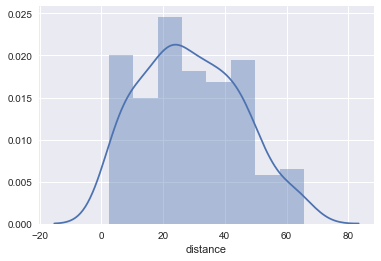

In [7]:
sns.distplot(c.distance)

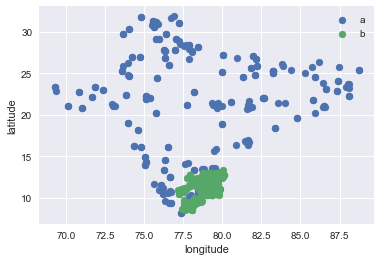

In [8]:
plt.scatter(a.longitude, a.latitude, label="a")
plt.scatter(b.longitude, b.latitude, label="b")
plt.legend()
plt.ylabel("latitude")
plt.xlabel("longitude")